In [766]:
# installing latest version of geopandas.
#!pip install git+git://github.com/geopandas/geopandas.git
git clone https://github.com/geopandas/geopandas.git


fatal: destination path 'geopandas' already exists and is not an empty directory.


In [147]:
#installing pycountry
#! pip install pycountry

In [85]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Display propertice
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# Date
import datetime

# Maps
import geopandas as gpd
import pycountry

from math import pi

# Display in Jupyter
from IPython.display import display, HTML

#models
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale,StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV,Lasso,Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df_19 =  pd.read_csv('../captstone/datasets/data.csv')

In [3]:
df_19 = df_19.drop(['Unnamed: 0', 'Photo', 'Flag', 'Club Logo', 'Real Face'], axis=1)
df_19.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [59]:
#cleaned up columns name 
df_19.columns = [i.lower() for i in df_19.columns]
df_19.head()

,id,name,age,nationality,overall,potential,club,value,wage,special,preferred foot,international reputation,weak foot,skill moves,position,jersey number,joined,loaned from,contract valid until,height,weight,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,release clause,lean,normal,stocky,high/ high,high/ low,high/ medium,low/ high,low/ low,low/ medium,medium/ high,medium/ low,medium/ medium,physical,skills,payoff,mental
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000,2202,Left,5.0,4.0,4.0,RF,10.0,"Jul 1, 2004",N/A,2021,67,159,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91,86,91,95,95,85.0,68,72,59,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,0,1,0,0,0,0,0,0,0,0,0,1,854,1133.0,0,562.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000,2228,Right,5.0,4.0,5.0,ST,7.0,"Jul 10, 2018",N/A,2022,74,183,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89,91,87,96,70,95.0,95,88,79,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,0,1,0,0,1,0,0,0,0,0,0,0,921,1102.0,0,578.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000,2143,Right,5.0,5.0,5.0,LW,10.0,"Aug 3, 2017",N/A,2022,69,150,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94,90,96,94,84,80.0,61,81,49,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,0,1,0,0,0,1,0,0,0,0,0,0,844,1069.0,1,570.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000,2281,Right,4.0,5.0,4.0,RCM,7.0,"Aug 30, 2015",N/A,2023,71,154,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78,76,79,91,77,91.0,63,90,75,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,0,1,0,1,0,0,0,0,0,0,0,0,829,1140.0,1,649.0
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000,2142,Right,4.0,4.0,4.0,LF,10.0,"Jul 1, 2012",N/A,2020,68,163,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,82+3,82+3,82+3,89+3,66+3,63+3,63+3,63+3,66+3,60+3,49+3,49+3,49+3,60+3,81.0,84,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94,88,95,90,94,82.0,56,83,66,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M,0,1,0,0,0,1,0,0,0,0,0,0,872,1048.0,0,576.0


In [4]:
df_19.isnull().sum()

NameError: name 'df_19' is not defined

In [6]:
#changing some nulls
df_19['loaned from'] = df_19['loaned from'].replace(np.nan, 'N/A')
df_19['club'] = df_19['club'].replace(np.nan, 'N/A')
df_19.dropna(axis=0, inplace=True)

In [7]:
#cleaned up the weight col
df_19['weight'] = [x.strip('lbs') for x in df_19['weight']]
df_19['weight'] = df_19['weight'].astype(int)
df_19['weight'].dtype

dtype('int64')

In [8]:
df_19.head()

,id,name,age,nationality,overall,potential,club,value,wage,special,preferred foot,international reputation,weak foot,skill moves,work rate,body type,position,jersey number,joined,loaned from,contract valid until,height,weight,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,release clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,"Jul 1, 2004",N/A,2021,5'7,159,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,"Jul 10, 2018",N/A,2022,6'2,183,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,"Aug 3, 2017",N/A,2022,5'9,150,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,"Aug 30, 2015",N/A,2023,5'11,154,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,€93M,€340K,2142,Right,4.0,4.0,4.0,High/ Medium,Normal,LF,10.0,"Jul 1, 2012",N/A,2020,5'8,163,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,82+3,82+3,82+3,89+3,66+3,63+3,63+3,63+3,66+3,60+3,49+3,49+3,49+3,60+3,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M


In [9]:
#  1) created a small df with just height to learn fow to convert this shit. 
# ex['split'] = [each.split("'") for each in ex['height']]
# ex.split.astype(int)
# [each[0]*12 for each in ex['split']]
# [i, j for i, j in ex['split']]
# df_19['height_in'] = 
# for i, j in ex.split:
#     inches = int(i) * 12 + int(j)
#     print(inches)

# in order for me to change the height colum to inches i had to creat a dummy colum that held the tuples 
#of each. Joey gave me the eacy idea of unpacking then running the list comprehensio and ie it back down to the height column. 
#---------------------------------------------------------------------------------------------------------------------



df_19['height'] = [each.split("'") for each in df_19['height']]
df_19['height'] = [int(i)*12 + int(j) for (i,j) in df_19['height']]
#df_19.rename(columns={"height": 'heingt_inches'}, inplace=True)

In [10]:
#changed to int so that i can create "gene" for physicality
df_19[['acceleration', 'agility', 'balance', 'jumping', 'reactions', 'sprintspeed', 'stamina', 'strength','finishing']] = \
df_19[['acceleration', 'agility', 'balance', 'jumping', 'reactions', 'sprintspeed', 'stamina', 'strength', 'finishing']].astype(int)


In [23]:
def wage_to_int(df_wage):
    try:
        value = df_wage[1:-1]
        suffix = df_wage[-1:]
        
        if suffix =='€':
            value = value * 1000
        elif suffix == 'K':
            value = value * 1
    except ValueError:
        value = 0
    return value
#wage_to_int('€565K')

#df_19['wage']= df_19['wage'].apply(wage_to_int).astype(int) * 1000
df_19[['value','wage']]

,value,wage
0,110500000.0,565000
1,77000000.0,405000
2,118500000.0,290000
4,102000000.0,355000
5,93000000.0,340000
6,67000000.0,420000
7,80000000.0,455000
8,51000000.0,380000
10,77000000.0,205000
11,76500000.0,355000


In [24]:
def value_to_int(df_value):
    try:
        value = float(df_value[1:-1])
        suffix = df_value[-1:]
        
        if suffix == 'M':
            value = value * 1000000
        elif suffix == 'K':
            value = value * 100
    except ValueError:
        value = 0
    return value

df_19['value'] = df_19['value'].apply(value_to_int)

#change to int
#df_19['value']= df_19.value.astype(int)

### EDA

In [26]:
#It looks like it 'melted' or dataframe to just these Series.
pd.melt(frame=df_19, id_vars='name', value_vars=['nationality'])

# this is to revese the melt
#melted.pivot(index='name', columns= 'variable', values= 'value')

,name,variable,value
0,L. Messi,nationality,Argentina
1,Cristiano Ronaldo,nationality,Portugal
2,Neymar Jr,nationality,Brazil
3,K. De Bruyne,nationality,Belgium
4,E. Hazard,nationality,Belgium
5,L. Modrić,nationality,Croatia
6,L. Suárez,nationality,Uruguay
7,Sergio Ramos,nationality,Spain
8,R. Lewandowski,nationality,Poland
9,T. Kroos,nationality,Germany


In [11]:
df_19.nlargest(5, columns='overall')

,id,name,age,nationality,overall,potential,club,value,wage,special,preferred foot,international reputation,weak foot,skill moves,work rate,body type,position,jersey number,joined,loaned from,contract valid until,height,weight,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,release clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,"Jul 1, 2004",N/A,2021,67,159,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91,86,91,95,95,85.0,68,72,59,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,"Jul 10, 2018",N/A,2022,74,183,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89,91,87,96,70,95.0,95,88,79,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,"Aug 3, 2017",N/A,2022,69,150,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94,90,96,94,84,80.0,61,81,49,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,"Aug 30, 2015",N/A,2023,71,154,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78,76,79,91,77,91.0,63,90,75,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,€93M,€340K,2142,Right,4.0,4.0,4.0,High/ Medium,Normal,LF,10.0,"Jul 1, 2012",N/A,2020,68,163,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,82+3,82+3,82+3,89+3,66+3,63+3,63+3,63+3,66+3,60+3,49+3,49+3,49+3,60+3,81.0,84,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94,88,95,90,94,82.0,56,83,66,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M


In [12]:
df_19.nsmallest(5, columns='overall')

,id,name,age,nationality,overall,potential,club,value,wage,special,preferred foot,international reputation,weak foot,skill moves,work rate,body type,position,jersey number,joined,loaned from,contract valid until,height,weight,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,release clause
18206,246269,G. Nugent,16,England,46,66,Tranmere Rovers,€60K,€1K,1321,Right,1.0,3.0,2.0,Medium/ Medium,Lean,CM,33.0,"Oct 30, 2018",N/A,2019,70,176,43+2,43+2,43+2,45+2,44+2,44+2,44+2,45+2,45+2,45+2,45+2,46+2,45+2,45+2,45+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,47+2,47+2,47+2,46+2,41.0,34,46.0,48.0,30.0,43.0,40.0,34.0,44.0,51.0,57,55,55,51,63,43.0,62,47,60,32.0,56.0,42.0,34.0,49.0,33.0,43.0,40.0,43.0,50.0,10.0,15.0,9.0,12.0,9.0,€165K
18186,240917,Zhang Yufeng,20,China PR,47,64,Beijing Renhe FC,€60K,€1K,1389,Right,1.0,3.0,2.0,Medium/ Medium,Normal,CM,26.0,"Jul 11, 2016",N/A,2019,70,174,43+2,43+2,43+2,46+2,44+2,44+2,44+2,46+2,47+2,47+2,47+2,46+2,46+2,46+2,46+2,46+2,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2,35.0,29,47.0,53.0,33.0,47.0,38.0,38.0,47.0,48.0,59,70,77,50,66,42.0,55,46,60,34.0,55.0,43.0,29.0,50.0,43.0,39.0,53.0,41.0,51.0,15.0,7.0,14.0,6.0,8.0,€167K
18187,240158,C. Ehlich,19,Germany,47,59,SpVgg Unterhaching,€40K,€1K,1366,Right,1.0,3.0,2.0,High/ Medium,Lean,RB,33.0,"Jul 1, 2017",N/A,2020,70,161,46+2,46+2,46+2,47+2,46+2,46+2,46+2,47+2,45+2,45+2,45+2,46+2,41+2,41+2,41+2,46+2,46+2,41+2,41+2,41+2,46+2,45+2,44+2,44+2,44+2,45+2,39.0,40,45.0,46.0,42.0,46.0,35.0,29.0,22.0,49.0,65,62,68,44,70,44.0,69,61,59,41.0,38.0,36.0,44.0,38.0,47.0,47.0,40.0,42.0,42.0,13.0,12.0,11.0,15.0,12.0,€66K
18188,240927,L. Collins,17,Wales,47,62,Newport County,€60K,€1K,1297,Right,1.0,3.0,2.0,Medium/ Medium,Lean,CM,38.0,"Jul 1, 2017",N/A,2021,70,148,45+2,45+2,45+2,49+2,48+2,48+2,48+2,49+2,48+2,48+2,48+2,49+2,45+2,45+2,45+2,49+2,44+2,41+2,41+2,41+2,44+2,43+2,39+2,39+2,39+2,43+2,41.0,38,30.0,50.0,33.0,51.0,41.0,30.0,48.0,50.0,69,72,55,45,66,49.0,61,33,40,36.0,36.0,36.0,44.0,47.0,36.0,46.0,33.0,38.0,41.0,5.0,12.0,8.0,13.0,10.0,€143K
18189,240160,A. Kaltner,18,Germany,47,61,SpVgg Unterhaching,€60K,€1K,1290,Right,1.0,3.0,2.0,Medium/ Medium,Lean,ST,24.0,"Jul 1, 2017",N/A,2020,70,165,45+2,45+2,45+2,48+2,46+2,46+2,46+2,48+2,46+2,46+2,46+2,47+2,40+2,40+2,40+2,47+2,38+2,34+2,34+2,34+2,38+2,36+2,32+2,32+2,32+2,36+2,37.0,48,30.0,45.0,43.0,50.0,41.0,38.0,30.0,51.0,62,66,67,39,70,38.0,81,55,60,35.0,28.0,25.0,43.0,41.0,48.0,37.0,28.0,15.0,22.0,15.0,5.0,14.0,12.0,8.0,€125K


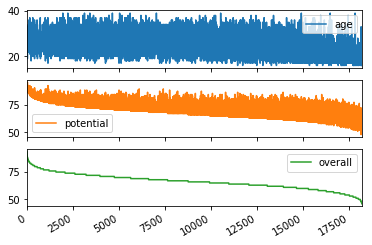

In [13]:
df_19.loc[:,['age','potential', 'overall']].plot(subplots=True);

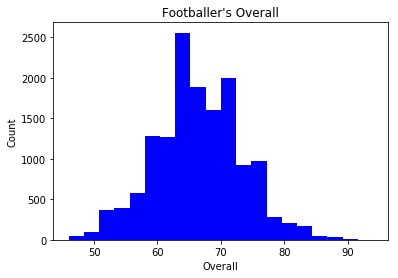

In [14]:
plt.hist(df_19.overall, bins=20, alpha=1, color='b')
plt.title("Footballer's Overall" )
plt.xlabel('Overall')
plt.ylabel('Count');

In [15]:
overall_mean = df_19.overall.mean()
overall_std = df_19.overall.std()
print('The mean for the Overall is',overall_mean, 'and the standard deviation is', overall_std )

The mean for the Overall is 66.38180831581089 and the standard deviation is 6.889961125101775


In [5]:
print(' percent of footballers values lower than €30M:', df_19[df_19.value <= 30000000].value.count() 
      / df_19.value.count() * 100)

NameError: name 'df_19' is not defined

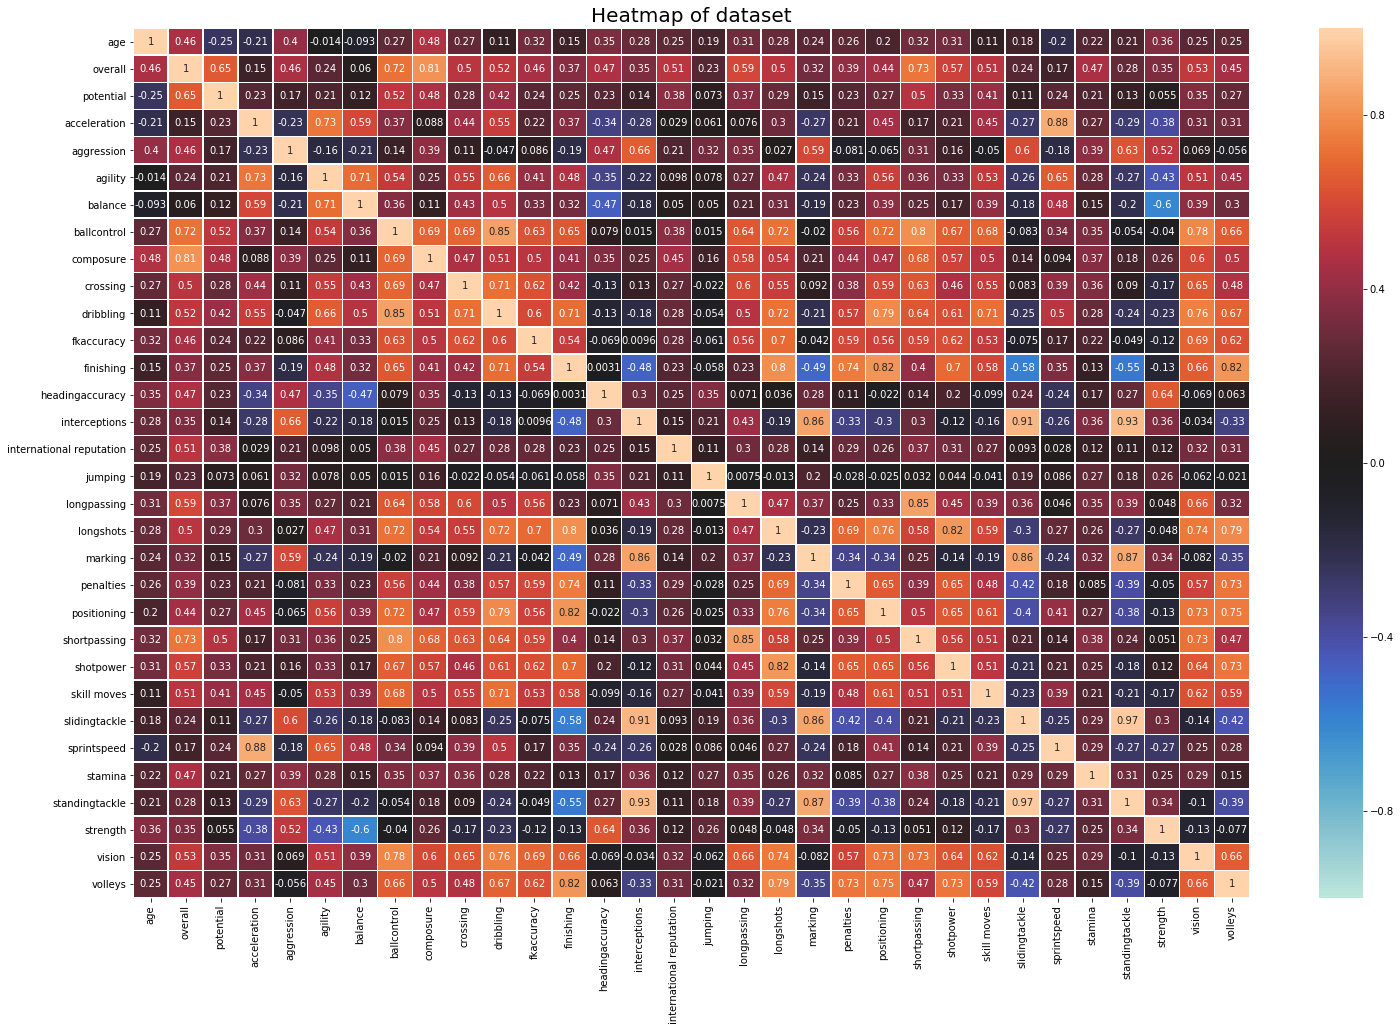

In [90]:
plt.rcParams['figure.figsize']=(25,16)
hm=sns.heatmap(df_19[['age', 'overall', 'potential', 'value', 'wage',
                'acceleration', 'aggression', 'agility', 'balance', 'ballcontrol', 
                'body type','composure', 'crossing','dribbling', 'fkaccuracy', 'finishing', 
                'headingaccuracy', 'interceptions','international reputation',
                'joined', 'jumping', 'longpassing', 'longshots',
                'marking', 'penalties', 'position', 'positioning',
                'shortpassing', 'shotpower', 'skill moves', 'slidingtackle',
                'sprintspeed', 'stamina', 'standingtackle', 'strength', 'vision',
                'volleys','release clause']].corr(), vmin=-1, vmax=1, annot = True, linewidths=.5, cmap='icefire')
hm.set_title(label='Heatmap of dataset', fontsize=20)
hm;

# i see some correaltion that make sense, like potential and overall have a decent corr. 
# balance and strength have the most negative correlation. Not sure why
# international rep is highly correlated with composure... very interesting. I would of thought something like age and overall would be the highest. 

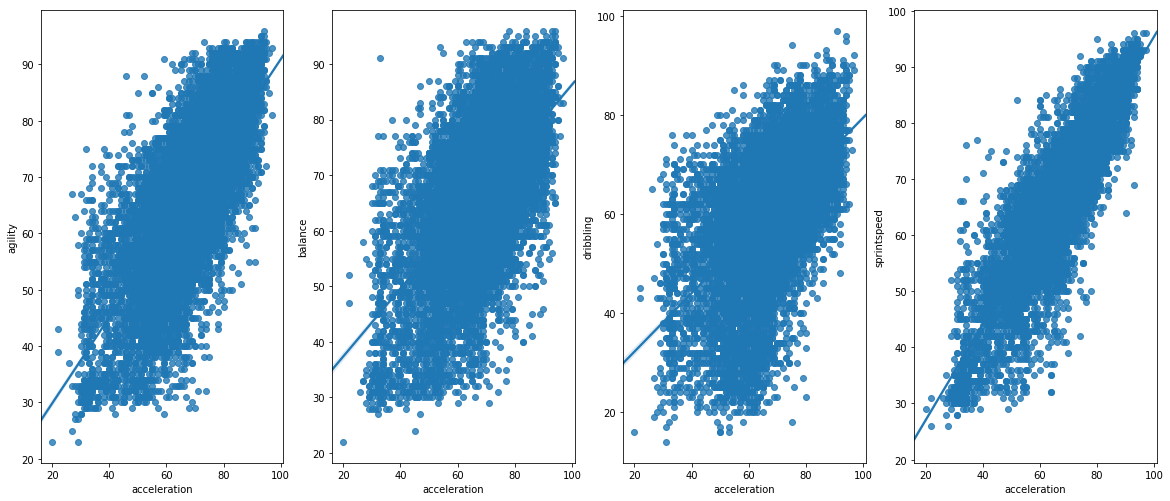

In [65]:
def make_scatter(df):
    feats = ('agility', 'balance', 'dribbling', 'sprintspeed')
    
    for index, feat in enumerate(feats):
        plt.subplot(len(feats)/4+1, 4, index+1,alpha=6.9)
        ax = sns.regplot(x = 'acceleration', y = feat, data = df)

plt.figure(figsize = (20, 20))
plt.subplots_adjust(hspace = 0.4)

make_scatter(df_19)

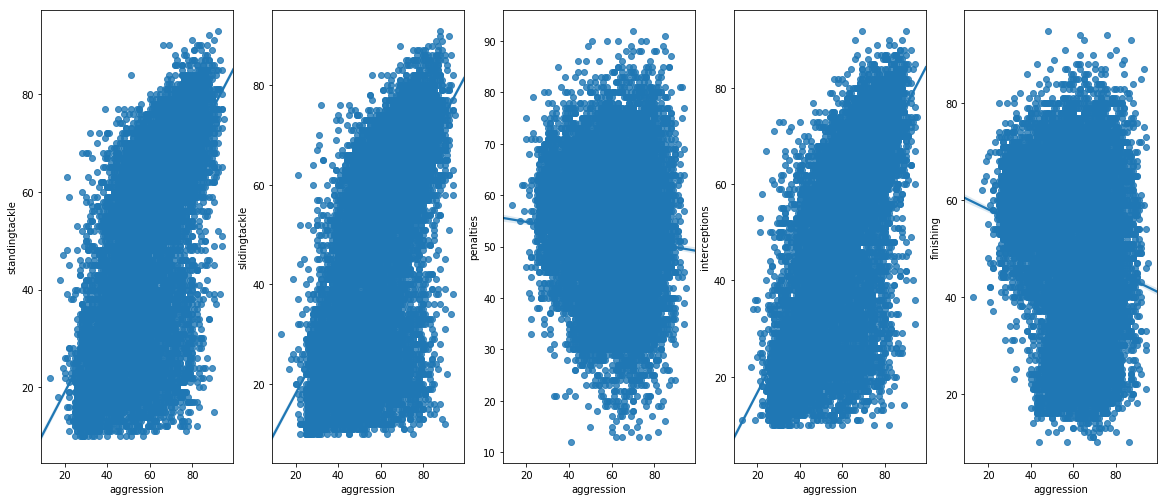

In [66]:
def aggression(df):
    feats = ('standingtackle', 'slidingtackle', 'penalties', 'interceptions', 'finishing')
    
    for index, feat in enumerate(feats):
        plt.subplot(len(feats)/5+1, 5, index+1,alpha=1.9)
        ax = sns.regplot(x = 'aggression', y = feat, data = df)

plt.figure(figsize = (20, 20))
plt.subplots_adjust(hspace = 0.4)

aggression(df_19)

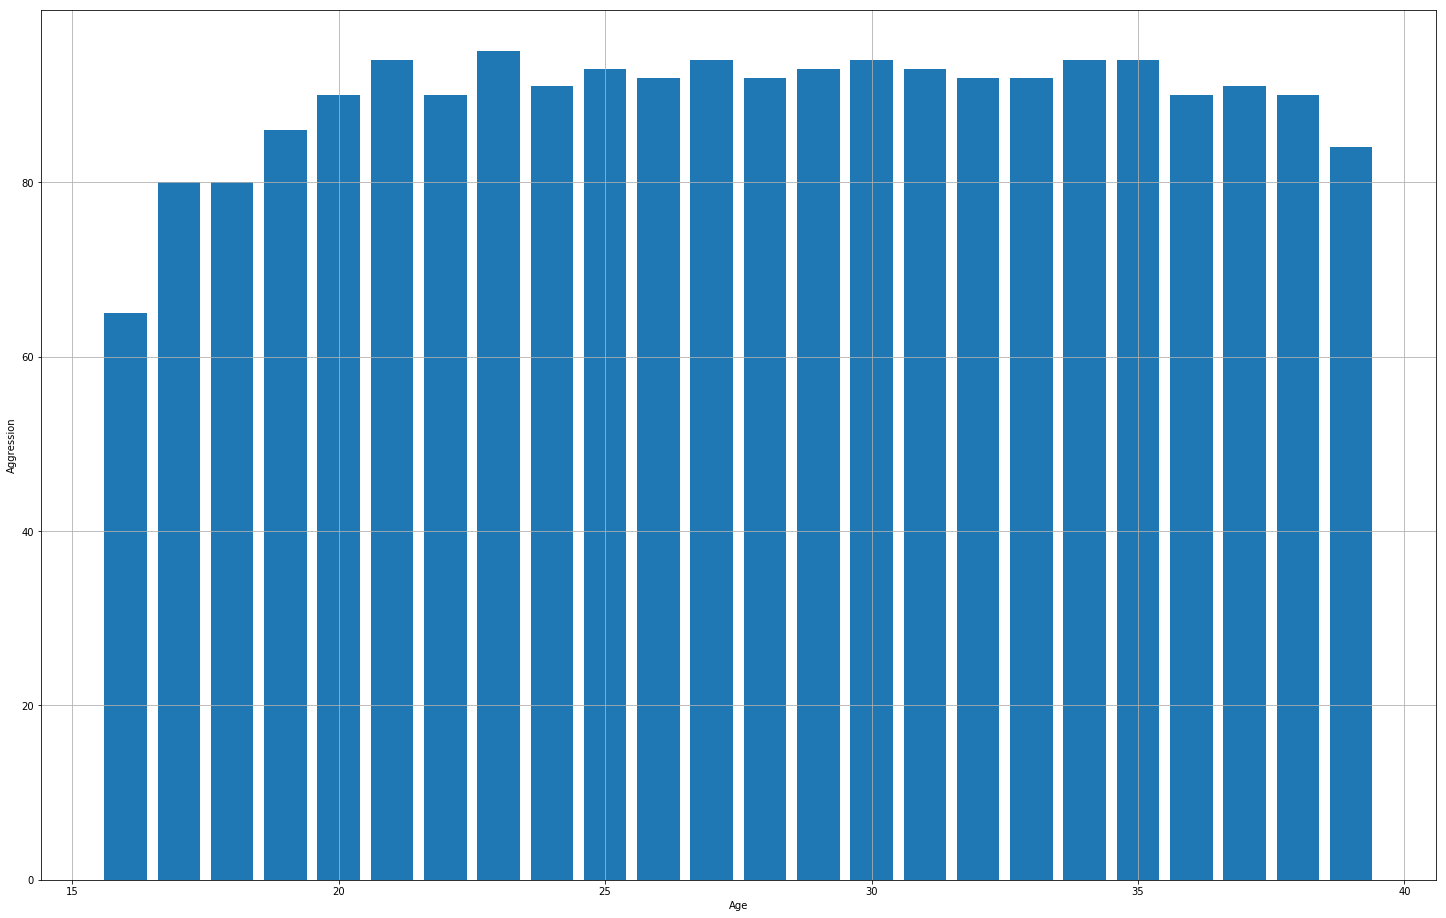

In [69]:
# Does age play a role of how aggresive you are? Nope... that shit is born within!!!
plt.bar(df_19['age'], df_19['aggression'])
plt.xlabel('Age')
plt.ylabel('Aggression')
plt.grid()

In [38]:
#160 out of 195 nations are represented in fifa. 
#df.groupby(by='nationality').groups.keys()

fifa_list = [each for each in df.groupby(by='nationality').groups.keys()]

fifa_list

In [40]:
countries = ['Afghanistan','Aland Islands','Albania','Algeria','American Samoa','Andorra','Angola',
    'Anguilla','Antarctica','Antigua & Barbuda','Argentina','Armenia','Aruba','Australia','Austria',
'Azerbaijan','Bahamas','Bahrain','Bangladesh','Barbados','Belarus','Belgium','Belize','Benin',
'Bermuda','Bhutan','Bolivia','Bonaire','Bosnia Herzegovina','Botswana','Bouvet Island','Brazil','British Indian Ocean Territory',
'Brunei Darussalam','Bulgaria','Burkina Faso','Burundi','Cambodia','Cameroon','Canada','Cape Verde',
'Cayman Islands','Central African Rep.','Chad','Chile','China PR','Christmas Island','Cocos Islands',
'Colombia','Comoros','DR Congo','Cook Islands','Costa Rica','Ivory Coast','Croatia','Cuba','Curacao','Cyprus','Czech Republic',
'Denmark','Djibouti','Dominica','Dominican Republic','Ecuador','Egypt','El Salvador','Equatorial Guinea',
'Eritrea','Estonia','Ethiopia','Falkland Islands','Faroe Islands','Fiji','Finland','France','French Guiana','French Polynesia','French Southern Territories',
'Gabon','Gambia','Georgia','Germany','Ghana','Gibraltar','Greece','Greenland','Grenada','Guadeloupe',
'Guam','Guatemala','Guernsey','Guinea','Guinea-Bissau','Guyana','Haiti','Honduras','Hong Kong',
'Hungary','Iceland','India','Indonesia','Iran','Iraq','Ireland','Isle of Man','Israel','Italy',
'Jamaica','Japan','Jordan','Kazakhstan','Kenya','Kiribati',"Korea DPR",'Korea Republic','Kuwait',
'Kyrgyzstan',"Laos",'Latvia','Lebanon','Lesotho','Liberia','Libya','Liechtenstein','Lithuania',
'Luxembourg','Macao','FYR Macedonia','Madagascar','Malawi','Malaysia','Maldives','Mali','Malta',
'Marshall Islands','Martinique','Mauritania','Mauritius','Mayotte','Mexico','Micronesia','Moldova'
'Monaco','Mongolia','Montenegro','Montserrat','Morocco','Mozambique','Myanmar','Namibia','Nauru',
'Nepal','Netherlands','New Caledonia','New Zealand','Nicaragua','Niger','Nigeria','Niue','Norfolk Island',
'Northern Mariana Islands','Norway','Oman','Pakistan','Palau','Palestine',
'Panama','Papua New Guinea','Paraguay','Peru','Philippines','Pitcairn','Poland','Portugal','Puerto Rico',
'Qatar','Reunion','Romania','Russia','Rwanda','Saint Barthelemy','Saint Helena, Ascension and Tristan da Cunha',
'Saint Kitts and Nevis','Saint Lucia','Saint Martin','Saint Pierre and Miquelon','Saint Vincent and the Grenadines','Samoa',
'San Marino','Sao Tome and Principe','Saudi Arabia','Senegal','Serbia','Seychelles','Sierra Leone',
'Singapore','Slovakia','Slovenia','Solomon Islands','Somalia','South Africa','South Georgia and the South Sandwich Islands',
'South Sudan','Spain','Sri Lanka','Sudan','Suriname','Svalbard and Jan Mayen','Swaziland','Sweden',
'Switzerland','Syria','Taiwan','Tajikistan','Tanzania','Thailand','Timor-Leste','Togo','Tokelau','Tonga','Trinidad and Tobago','Tunisia','Turkey',
'Turkmenistan','Turks and Caicos Islands','Tuvalu','Uganda','Ukraine','United Arab Emirates','United Kingdom',
'United States','Uruguay','Uzbekistan','Vanuatu','Venezuela','Vietnam','Virgin Islands, British','Virgin Islands, U.S.',
'Wallis and Futuna','Western Sahara','Yemen','Zambia','Zimbabwe']

In [41]:
# what countries are left out of fifa 19
left_out = list(set(countries).difference(fifa_list))

left_out.sort()
left_out
#Fifa breaks up the UK as individual soverignty to show the players distinct nationality. Interesting 
#to me because i feel they secretly considered the politics of brexit and the scottish wanting independence.  

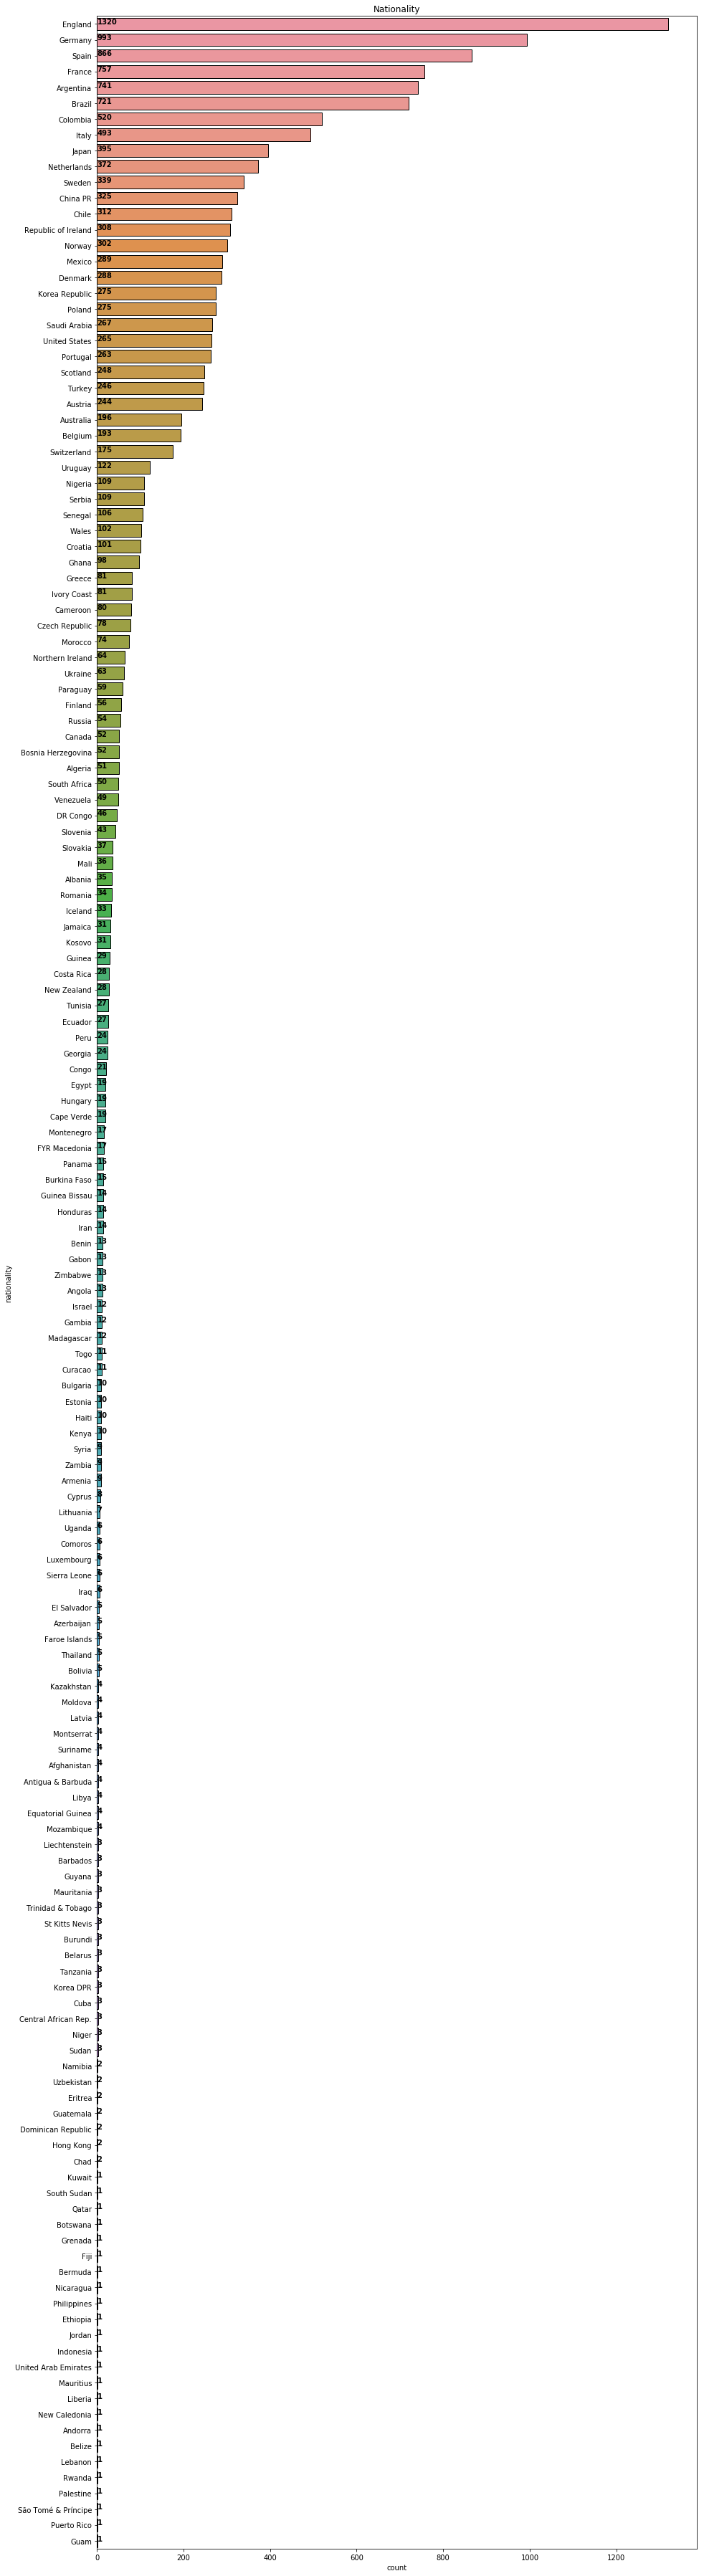

In [28]:
# player count by nationality

#need to figure out how just get the top 20 and bottom top
plt.figure(figsize=(15,65))

ax= sns.countplot(y = df_19['nationality'],
                 order = df_19['nationality'].value_counts().index,
                 linewidth = 1, edgecolor= 'k'*df_19['nationality'].nunique())
for i,j in enumerate(df_19['nationality'].value_counts().values):
    ax.text(.7,i,j,weight='bold')
plt.title('Nationality')
plt.show()

plt.sav

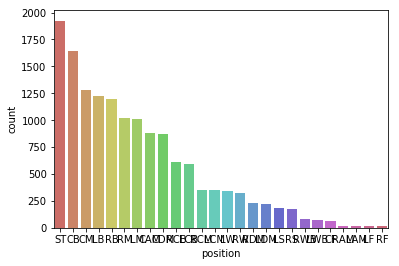

In [29]:
#players by pos i want to add numbers into the bars 
ax = sns.countplot(x=df_19['position'], 
                   order= df_19['position'].value_counts().index,
                   palette='hls', linewidth=1)

In [31]:
che.position.value_counts(normalize=False).index

Index(['ST', 'CB', 'LM', 'RM', 'LB', 'RB', 'CDM', 'CAM', 'CM', 'RCB', 'LCB',
       'LW', 'RW', 'LCM', 'LDM', 'RCM', 'LS', 'RDM', 'RS', 'LF', 'LWB', 'RF',
       'RWB'],
      dtype='object')

In [32]:
che.position.value_counts(normalize=False).values

array([108,  92,  55,  54,  54,  47,  43,  42,  40,  33,  30,  25,  25,
        22,  16,  16,  12,   9,   9,   3,   3,   2,   1])

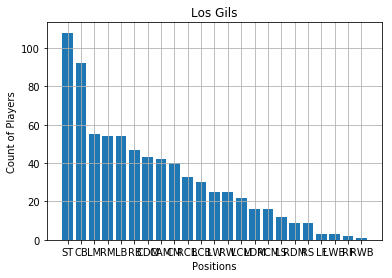

In [30]:
che = df_19[df_19['nationality'] == 'Argentina']
plt.grid()
plt.bar(che.position.value_counts(normalize=False).index, che.position.value_counts(normalize=False).values)
plt.xlabel('Positions')
plt.ylabel('Count of Players')
plt.title('Los Gils');

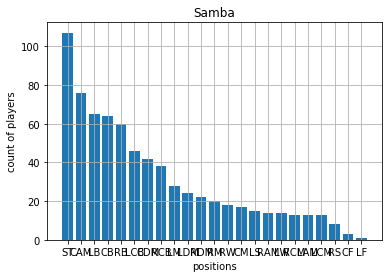

In [33]:
samba = df_19[df_19['nationality'] == 'Brazil']
plt.grid()
plt.bar(samba.position.value_counts(normalize=False).index, samba.position.value_counts(normalize=False).values)
plt.xlabel('positions')
plt.ylabel('count of players')
plt.title('Samba');

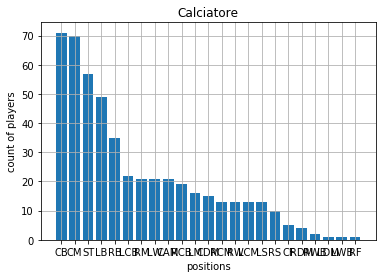

In [34]:
pasta = df_19[df_19['nationality'] == 'Italy']
plt.figure()
plt.grid()
plt.bar(pasta.position.value_counts(normalize=False).index, pasta.position.value_counts(normalize=False).values)
plt.xlabel('positions')
plt.ylabel('count of players')
plt.title('Calciatore');

In [ ]:
# what position is produced the most by each nation??

In [92]:
df_19[df_19['preferred foot'] == 'Right'][['name','overall']].head()

,name,overall
1,Cristiano Ronaldo,94
2,Neymar Jr,92
4,K. De Bruyne,91
5,E. Hazard,91
6,L. Modrić,91


In [93]:
df_19[df_19['preferred foot'] == 'Left'][['name','overall']].head()

,name,overall
0,L. Messi,94
13,David Silva,90
15,P. Dybala,89
17,A. Griezmann,89
24,G. Chiellini,89


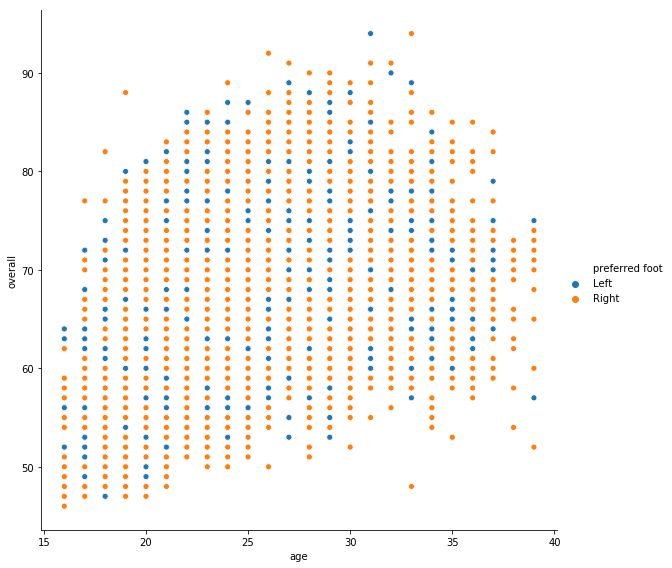

In [541]:
sns.relplot(x='age', y='overall', data=df_19, hue='preferred foot',height=8)

In [35]:
fig = plt.figure(figsize=(30,6));
sns.catplot(x='mental', y='marking', data=df_19, kind='violin');

ValueError: Could not interpret input 'mental'

<Figure size 2160x432 with 0 Axes>

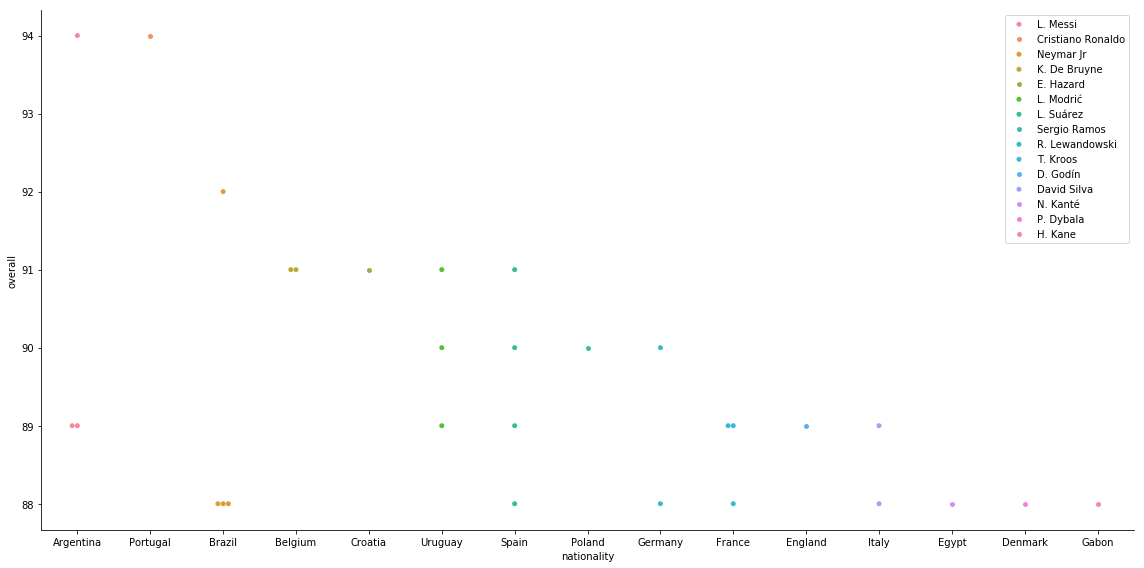

In [555]:
sns.catplot(x='nationality', y='overall', data=df_19[df_19['overall'] > 85][0:30], kind='swarm', 
            height=8,margin_titles=True, aspect=2)
plt.legend(df_19['name']);

In [36]:
df_19.iloc[df_19.groupby(df_19['position'])['overall'].idxmax()][['name', 'position', 'club']].set_index('name')

,position,club
name,,
E. Cavani,LS,Paris Saint-Germain
N. Kanté,LDM,Chelsea
K. Mbappé,RM,Paris Saint-Germain
Laure Santeiro,CAM,Fluminense
Marco Asensio,RW,Real Madrid
F. Balbuena,RCB,West Ham United
P. Pogba,RDM,Manchester United
Isco,LW,Real Madrid
David Silva,LCM,Manchester City


In [570]:
df_19[df_19['position'] == 'CAM'] 

,id,name,age,nationality,overall,potential,club,value,wage,special,preferred foot,international reputation,weak foot,skill moves,position,jersey number,joined,loaned from,contract valid until,height,weight,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,release clause,lean,normal,stocky,high/ high,high/ low,high/ medium,low/ high,low/ low,low/ medium,medium/ high,medium/ low,medium/ medium,physical,skills,payoff,mental
17,194765,A. Griezmann,27,France,89,90,Atlético Madrid,78000000,145000,2246,Left,4.0,3.0,4.0,CAM,7.0,"Jul 28, 2014",N/A,2023,69,161,86+3,86+3,86+3,87+3,87+3,87+3,87+3,87+3,86+3,86+3,86+3,86+3,80+3,80+3,80+3,86+3,70+3,67+3,67+3,67+3,70+3,67+3,61+3,61+3,61+3,67+3,82.0,90,84.0,83.0,87.0,88.0,84.0,78.0,76.0,90.0,88,85,90,90,80,80.0,90,83,62,82.0,69.0,35.0,91.0,83.0,79.0,87.0,59.0,47.0,48.0,14.0,8.0,14.0,13.0,14.0,€165.8M,1,0,0,1,0,0,0,0,0,0,0,0,873,1106.0,1,598.0
31,190460,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,73500000,205000,2117,Right,3.0,5.0,4.0,CAM,10.0,"Aug 30, 2013",N/A,2020,71,168,79+3,79+3,79+3,84+3,84+3,84+3,84+3,84+3,86+3,86+3,86+3,85+3,85+3,85+3,85+3,85+3,71+3,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3,88.0,80,52.0,91.0,77.0,84.0,86.0,87.0,88.0,91.0,75,73,79,88,81,84.0,50,92,58,89.0,46.0,56.0,83.0,91.0,67.0,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,€141.5M,1,0,0,0,0,1,0,0,0,0,0,0,811,1085.0,3,584.0
61,201942,Roberto Firmino,26,Brazil,86,87,Liverpool,53000000,195000,2187,Right,3.0,4.0,4.0,CAM,9.0,"Jul 6, 2015",N/A,2023,71,168,83+3,83+3,83+3,83+3,84+3,84+3,84+3,83+3,84+3,84+3,84+3,83+3,82+3,82+3,82+3,83+3,72+3,73+3,73+3,73+3,72+3,69+3,67+3,67+3,67+3,69+3,72.0,87,77.0,86.0,81.0,87.0,80.0,65.0,75.0,88.0,78,77,80,86,81,81.0,81,90,74,76.0,73.0,58.0,87.0,85.0,72.0,87.0,60.0,64.0,42.0,8.0,11.0,9.0,6.0,10.0,€104.7M,1,0,0,1,0,0,0,0,0,0,0,0,862,1069.0,1,612.0
66,189596,T. Müller,28,Germany,86,86,FC Bayern München,45000000,135000,2097,Right,4.0,4.0,3.0,CAM,13.0,"Aug 10, 2008",N/A,2021,73,165,82+3,82+3,82+3,81+3,82+3,82+3,82+3,81+3,82+3,82+3,82+3,81+3,79+3,79+3,79+3,81+3,68+3,66+3,66+3,66+3,68+3,66+3,59+3,59+3,59+3,66+3,79.0,87,82.0,83.0,84.0,75.0,81.0,59.0,72.0,82.0,73,75,75,91,72,78.0,81,87,68,80.0,57.0,58.0,92.0,85.0,60.0,83.0,44.0,41.0,44.0,6.0,7.0,11.0,14.0,14.0,€74.3M,1,0,0,1,0,0,0,0,0,0,0,0,834,1034.0,0,574.0
74,176635,M. Özil,29,Germany,86,86,Arsenal,43500000,190000,1911,Left,4.0,2.0,4.0,CAM,10.0,"Sep 2, 2013",N/A,2021,71,168,75+3,75+3,75+3,82+3,81+3,81+3,81+3,82+3,84+3,84+3,84+3,82+3,78+3,78+3,78+3,82+3,57+3,56+3,56+3,56+3,57+3,52+3,40+3,40+3,40+3,52+3,83.0,73,54.0,89.0,80.0,84.0,84.0,77.0,82.0,90.0,72,69,79,84,70,70.0,48,69,57,75.0,48.0,24.0,83.0,91.0,67.0,82.0,24.0,16.0,19.0,6.0,14.0,10.0,6.0,14.0,€82.7M,1,0,0,0,0,0,0,0,0,0,1,0,760,982.0,0,507.0
80,216594,N. Fekir,24,France,85,89,Olympique Lyonnais,50000000,92000,2102,Left,3.0,3.0,4.0,CAM,18.0,"Jul 1, 2013",N/A,2020,68,165,79+3,79+3,79+3,84+3,83+3,83+3,83+3,84+3,83+3,83+3,83+3,83+3,77+3,77+3,77+3,83+3,62+3,60+3,60+3,60+3,62+3,57+3,50+3,50+3,50+3,57+3,83.0,82,49.0,83.0,77.0,90.0,81.0,79.0,75.0,89.0,79,79,90,80,91,84.0,69,80,82,82.0,73.0,28.0,81.0,81.0,81.0,89.0,31.0,37.0,25.0,15.0,9.0,8.0,14.0,15.0,€98.8M,0,0,1,0,0,1,0,0,0,0,0,0,861,1023.0,4,551.0
96,181872,A. Vidal,31,Chile,85,85,FC Barcelona,26000000,205000,2230,Right,4.0,4.0,3.0,CAM,8.0,"Aug 6, 2018",N/A,2021,71,165,78+3,78+3,78+3,76+3,78+3,78+3,78+3,76+3,78+3,78+3,78+3,76+3,81+3,81+3,81+3,76+3,79+3,83+3,83+3,83+3,79+3,80+3,83+3,83+3,83+3,80+3,76.0,75,82.0,83.0,78.0,76.0,76.0,68.0,79.0,82.0,60,55,74,84,75,86.0,85,83,79,85.0,93.0,84.0,80.0,80.0,81.0,81.0,82.0,87.0,86.0,4.0,2.0,4.0,2.0,4.0,€53.3M,0,1,0,0,


### Create the DNA column

In [37]:
df_19.columns.sort_values(ascending=False)

Index(['work rate', 'weight', 'weak foot', 'wage', 'volleys', 'vision',
       'value', 'strength', 'standingtackle', 'stamina', 'st', 'sprintspeed',
       'special', 'slidingtackle', 'skill moves', 'shotpower', 'shortpassing',
       'rwb', 'rw', 'rs', 'rm', 'rf', 'release clause', 'reactions', 'rdm',
       'rcm', 'rcb', 'rb', 'ram', 'preferred foot', 'potential', 'positioning',
       'position', 'penalties', 'overall', 'nationality', 'name', 'marking',
       'lwb', 'lw', 'ls', 'longshots', 'longpassing', 'loaned from', 'lm',
       'lf', 'ldm', 'lcm', 'lcb', 'lb', 'lam', 'jumping', 'joined',
       'jersey number', 'international reputation', 'interceptions', 'id',
       'height', 'headingaccuracy', 'gkreflexes', 'gkpositioning', 'gkkicking',
       'gkhandling', 'gkdiving', 'fkaccuracy', 'finishing', 'dribbling',
       'curve', 'crossing', 'contract valid until', 'composure', 'cm', 'club',
       'cf', 'cdm', 'cb', 'cam', 'body type', 'ballcontrol', 'balance',
       'agility'

In [44]:
### fixed all the boody types to create dummy columns. 
df_19['body type'].unique()

#df_19['body type'][26] = 'Normal'
#df_19['body type'][0:3] = 'Normal'
#df_19['body type'][370] = 'Lean'
#df_19['body type'][9501] = 'Stocky'

#df_19[(df_19['body type'] == 'Akinfenwa')]

array(['Normal', 'Lean', 'Stocky'], dtype=object)

In [95]:
#Get dummies
# dummy = pd.get_dummies(df_19['body type'], sparse=False, dtype=int)
# dummy.head()

df_19= pd.concat([df_19,pd.get_dummies(df_19['body type'],sparse=False,dtype=int)],axis=1).drop(['body type'], axis=1)


#dummied work rate and dropped original column
df_19= pd.concat([df_19,pd.get_dummies(df_19['work rate'],dtype=int)],axis=1).drop(['work rate'], axis=1)

#df = pd.concat([df,pd.get_dummies(df['mycol'], prefix='mycol',dummy_na=True)],axis=1).drop(['mycol'],axis=1)

In [46]:
### get dummies for bodytype and work rate

df_19['physical']= df_19['acceleration'] + df_19['agility'] + df_19['balance'] + df_19['jumping'] \
+ df_19['reactions'] + df_19['sprintspeed'] + df_19['stamina'] + df_19['strength'] + df_19['Lean'] \
+ df_19['Normal'] + df_19['Stocky'] + df_19['height'] + df_19['weight'] + df_19['High/ High'] + df_19['High/ Low'] \
+ df_19['Medium/ Low'] + df_19['Medium/ Medium']+ df_19['High/ Medium'] + df_19['Low/ High'] + df_19['Low/ Low']\
+ df_19['Low/ Medium'] + df_19['Medium/ High'] - df_19['age']

# plt.bar(df_19['name'][0:16], df_19['physical'].sort_values(ascending=False)[0:16]);

#df_19.dtypes.sort_values(ascending=True)


In [47]:
df_19['skills']= df_19['ballcontrol'] + df_19['crossing'] + df_19['curve'] + \
df_19['dribbling'] + df_19['finishing'] + df_19['fkaccuracy'] + df_19['headingaccuracy'] + \
df_19['longpassing'] + df_19['longshots'] + df_19['shortpassing'] + df_19['shotpower'] + df_19['skill moves'] + \
df_19['slidingtackle'] + df_19['standingtackle'] + df_19['volleys']  +  df_19['weak foot']


#plt.bar(df_19['name'][0:10],df_19['skills'].sort_values(ascending=False)[0:10])

In [ ]:
plt.scatter(df_19['skills'].sort_values(ascending=True)[0:10],df_19['name'].sort_values(ascending=False)[0:10])

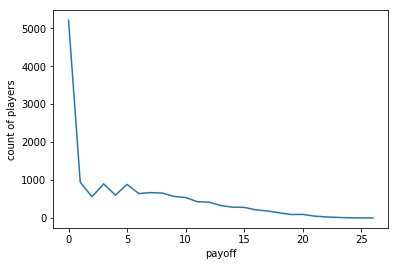

In [53]:
#Engineered 
df_19['payoff'] = df_19['potential']-df_19['overall'] 
plt.plot(df_19.groupby(by='payoff').size())
plt.ylabel('count of players')
plt.xlabel('payoff');

In [51]:
df_19['mental'] = df_19['aggression'] + df_19['composure'] + df_19['interceptions'] + df_19['marking'] \
+ df_19['payoff'] + df_19['positioning'] + df_19['reactions'] + df_19['international reputation'] + df_19['penalties'] \
+ df_19['vision']

#plt.bar(df_19['mental'].sort_values(ascending=False)[0:10], df_19['name'].sort_values(ascending=False)[0:10])

### explore hieght and wieght by postions.

In [ ]:
#sns.swarmplot(df_19['height'],df_19['value']/1000000, data=df_19[df_19['position'] == 'ST']);

In [586]:
# sns.swarmplot(df_19['age'],df_19['payoff']);

In [ ]:
# sns.scatterplot(df_19['height'],df_19['value']/100000, data=df_19[df_19['position'] == 'ST']);

In [ ]:
# sns.scatterplot(df_19['weight'],df_19['value']/1000000, data=df_19[df_19['position'] == 'ST'],legend='full');

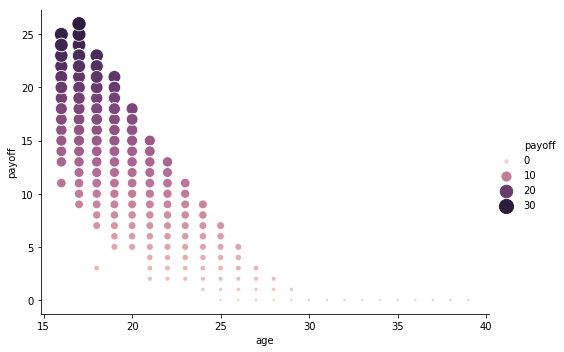

In [627]:
# sns.lmplot(x='age', y='payoff', hue="payoff",
#            col='payoff', row='age', data=df_19);

sns.relplot(x="age", y="payoff", size="payoff", sizes=(10, 200), data=df_19, aspect=1.4, hue='payoff');

### Ridge, Lasso, Linear Regression 

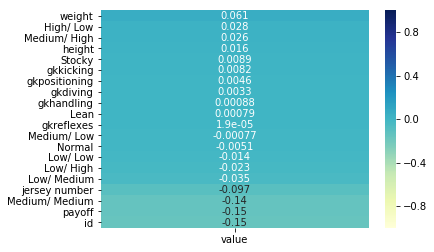

In [54]:
sns.heatmap(df_19.corr()[['value']].sort_values('value',ascending=False).tail(20),
            vmax=1, vmin=-1, cmap='YlGnBu', annot=True);

I know i have a multicolinearity issues bc of the'genes' i created. Its evidined in in lr model, its also predicting the best. 
I have to see which which coeffs ridge and lasso are using to see what coefs were dropped. 
I think i may have to feature engineer the test set as well. I foudn that 4 of my engineered features were pulled. I believe it was bc of multicolinearity. 

In [60]:
#remeber to rerun the lower case list comprehension at the beginning. 
features = df_19[['potential','reactions','ballcontrol', 'international reputation','composure',
                  'overall', 'special','skill moves','dribbling','skills','physical','mental','lean','normal', 'stocky', 
                  'high/ high', 'high/ low', 'high/ medium', 'wage', 'shortpassing', 'vision','weight','height',
                  'low/ high', 'low/ low', 'low/ medium', 'medium/ high', 'medium/ low', 'medium/ medium', 
                 'physical','payoff', 'mental']]
features = features.astype(int)

X= features
y=df_19['value']

In [61]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=.33,
                                                random_state=42)
print (len(X_test))
print (len(y_test))

4866
4866


In [62]:
ss= StandardScaler()
ss.fit(X_train)
X_train_s=ss.transform(X_train)
X_test_s=ss.transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


### Linear Reg

In [63]:
lr = LinearRegression(n_jobs=40)
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=40, normalize=False)

### Ridge

In [64]:
ridge_alphas=np.logspace(0,5,1000)


In [65]:
rr = RidgeCV(ridge_alphas,cv=5)
rr.fit(X_train_s,y_train)

RidgeCV(alphas=array([1.00000e+00, 1.01159e+00, ..., 9.88542e+04, 1.00000e+05]),
    cv=5, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [66]:
rr100= RidgeCV(ridge_alphas,cv=100)
rr100.fit(X_train_s,y_train)

RidgeCV(alphas=array([1.00000e+00, 1.01159e+00, ..., 9.88542e+04, 1.00000e+05]),
    cv=100, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)

### Lasso

In [125]:
lasso_optimal_alpha = lasso_model.alpha_
lasso_optimal_alpha

0.9900000000000008

In [139]:
lasso = LassoCV(cv=100,max_iter=2000,random_state=42,n_jobs=30)
lasso.fit(X_train_s,y_train)
coeff_used = np.sum(lasso.coef_!=0)
coeff_used

28

In [131]:
mean_squared_error(y_test, lasso.predict(X_test_s))

7867359838776.263

In [140]:
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train_s,y_train)
Ridge_test_score = rr.score(X_test_s, y_test)
Ridge_train_score100 = rr100.score(X_train_s,y_train)
Ridge_test_score100 = rr100.score(X_test_s, y_test)
lasso_train_score=lasso.score(X_train_s,y_train)
lasso_test_score=lasso.score(X_test_s,y_test)
print ("linear regression train score:", train_score)
print ("linear regression test score:", test_score)
print ("ridge regression train score low alpha:", Ridge_train_score)
print ("ridge regression test score low alpha:", Ridge_test_score)
print ("ridge regression train score high alpha:", Ridge_train_score100)
print ("ridge regression test score high alpha:", Ridge_test_score100)
print ("lasso regression train score:", lasso_train_score)
print ('lasso regression test score:', lasso_test_score)

linear regression train score: 0.8001449216513237
linear regression test score: 0.7956369793136304
ridge regression train score low alpha: 0.8001424055036046
ridge regression test score low alpha: 0.7956467568349824
ridge regression train score high alpha: 0.797884531398886
ridge regression test score high alpha: 0.7925219612987189
lasso regression train score: 0.7997754218768265
lasso regression test score: 0.7954739861172186


In [ ]:
# predictions  =  model.predict(X)
# score        =  model.score(X, y)

# # Plot the model
# plt.figure(figsize=(8,8))
# plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
# plt.xlabel("Predicted Values from CARAT - $\hat{y}$")
# plt.ylabel("Actual Values PRICE - y")

# plt.plot([0, np.max(y)], [0, np.max(y)], c = 'k')

# plt.show()

# print("score: ", score)


In [147]:
predict=lr.predict(X)
np.round(predict, decimals=2)
print('this is my MSE:',np.round(np.sqrt(mean_squared_error(y,predict)), decimals=2))
print('----------')
print('this is my mean coef:', lr.coef_.mean())
print('----------')
print('this is my mean intercept:',lr.intercept_.mean())
print('----------')
print('this is my r2 score:',r2_score(y, predict))

this is my MSE: 2657576.06
----------
this is my mean coef: 72571.42592867336
----------
this is my mean intercept: -19903647.06992822
----------
this is my r2 score: 0.7985283331421655


In [151]:
y_hat = lr.predict(X_test)

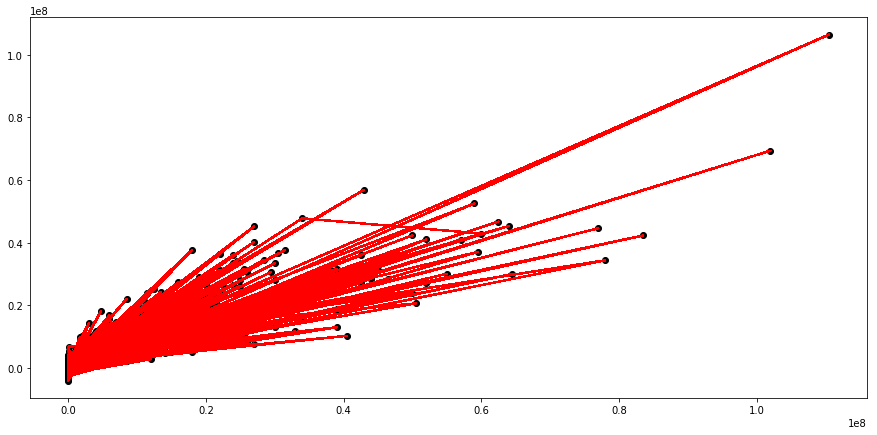

In [156]:
# trying to plot the residuals
# create a figure
plt.figure(figsize=(15,7))

# plot a scatter plot on it with our data
plt.scatter(y_test, y_hat, c='k')
plt.plot(y_test, y_hat, color='r')

#iterate over predictions
for _, row in df_19.iterrows():
    plt.plot((y_test), (y_hat), 'r-');

In [1]:
print()

In [ ]:
# tryinhttp://localhost:8888/notebooks/capstone_public/captstone/value%20with%20linear%20regression%20.ipynb#g to plot the residuals
# create a figure
plt.figure(figsize=(15,7))

# plot a scatter plot on it with our data
plt.scatter(y_test, y_hat, c='k')
plt.plot(y_test, y_hat, color='r')

# #iterate over predictions
# for _, row in df_19.iterrows():
#     plt.plot((y_test), (y_hat));

In [141]:
preds_ridge = rr.predict(X_test_s)
np.round(preds_ridge,decimals=2)
print(np.round(np.sqrt(mean_squared_error(y_test,preds_ridge)),decimals=2))


2803696.49


In [142]:
preds_ridge100= rr100.predict(X_test_s)
np.round(preds_ridge100,decimals=2)
np.round(np.sqrt(mean_squared_error(y_test,preds_ridge100)), decimals=2)

2825051.03

In [143]:
preds_lasso = lasso.predict(X_test_s)
np.round(preds_lasso, decimals=2)
np.round(np.sqrt(mean_squared_error(y_test,preds_lasso)), decimals=2)

2804881.43

### what coefs are being used by ridge and lasso

In [286]:
# pd.DataFrame({
#     'coef': X.columns,
#     'vals': lasso.coef_
# }).sort_values(by='vals')

In [74]:
pd.Series(lasso.coef_ != 0, index=X.columns)

potential                    True
reactions                    True
ballcontrol                  True
international reputation     True
composure                    True
overall                      True
special                      True
skill moves                  True
dribbling                    True
skills                      False
physical                     True
mental                       True
lean                         True
normal                      False
stocky                       True
high/ high                  False
high/ low                    True
high/ medium                 True
wage                         True
shortpassing                 True
vision                       True
weight                       True
height                       True
low/ high                    True
low/ low                     True
low/ medium                  True
medium/ high                 True
medium/ low                  True
medium/ medium               True
physical      

In [96]:
# pd.Series(rr.coef_ != 0, index=X.columns)

In [97]:
# pd.Series(rr100.coef_ != 0, index=X.columns)

In [409]:
### just wanted to see if could do this... took me an hour bc i couldnt figure out how to rename columns with same name. 

# # a= pd.DataFrame(rr.coef_, index=X.columns)
# # a.head()

# # b =pd.DataFrame(rr100.coef_, index=X.columns)
# # b

# a_b = pd.concat([a,b], axis=1)
# a_b.columns = ['rr', 'rr100']
# #a_b.rename(columns={0:'rr'})
# a_b